# Analise de performance do jogador Ben Simmonds em relação ao pagamento recebido. 


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
players_salary = pd.read_excel('Salario.xlsx')

In [0]:
players_stats = pd.read_excel('2018-2019 NBA Player Stats  NBAstuffer.xlsx', header=1)

In [6]:
players_salary.head()

,Jogador,Posição,Time,Salario
0,Aaron Gordon,PF,Orlando Magic,19863636
1,Aaron Holiday,PG,Indiana Pacers,2329200
2,Aaron Jackson,F,Houston Rockets,1378242
3,Abdel Nader,SF,Oklahoma City Thunder,1618520
4,Admiral Schofield,SG,Washington Wizards,1000000


In [0]:
players_stats20 = pd.read_excel('2019-2020 NBA Player Stats  NBAstuffer.xlsx', header=1)

In [0]:
players20 = players_stats20.merge(players_salary, left_on='FULL NAME', right_on='Jogador', how='right')

In [0]:
players20.fillna(0, inplace=True)

In [0]:
players20 = players20.query('AGE > 0')

In [0]:
players = players_stats.merge(players_salary, left_on='FULL NAME', right_on='Jogador', how='right')

In [0]:
players.fillna(0, inplace=True)

In [0]:
players = players.query('AGE > 0')

## Checando a distribuição de Idade e Salário

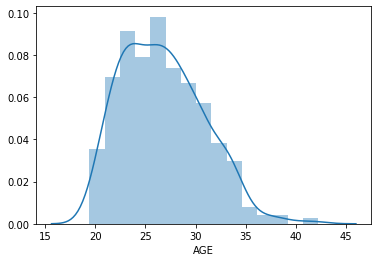

In [14]:
  sns.distplot(players.AGE)

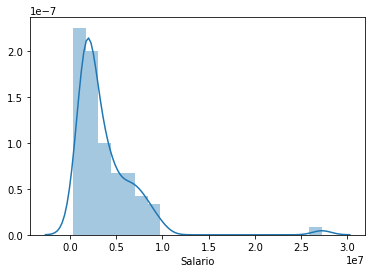

In [15]:
sns.distplot(players.query('AGE <= 22.72').Salario)

# Referência 2018 -2019.

### Olhando os jogadores com média de idade menor que Ben Simmons

In [16]:
players.query('AGE <= 22.72').Salario.describe().round()

count          89.0
mean      3715314.0
std       3426079.0
min        341831.0
25%       1620564.0
50%       2530680.0
75%       4764960.0
max      27285000.0
Name: Salario, dtype: float64

In [17]:
bs = players.loc[players['FULL NAME'].str.contains('Ben Simmons')]
bs

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,TRB,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Jogador,Posição,Time,Salario
410,0.0,Ben Simmons,Phi,G-F,22.72,79.0,34.2,71.2,22.1,19.3,428.0,0.6,954.0,0.566,6.0,0.0,0.563,0.582,16.9,8.8,13.7,7.7,34.2,1.42,0.77,3.47,12.2,113.8,103.1,Ben Simmons,PG,Philadelphia 76ers,8113930


### Comparando as Estatísticas do Ben Simmons com os demais jogadores da Liga

#### Jogadores que recebem a mesma faixa salarial do Ben Simmons

In [18]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].PPG)
print(players[players["Salario"].between(8000000, 9000000, inclusive = True)].PPG.describe())

410    16.9
Name: PPG, dtype: float64
count    15.000000
mean     11.300000
std       4.053217
min       4.000000
25%       9.150000
50%      10.800000
75%      13.050000
max      20.000000
Name: PPG, dtype: float64


In [19]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].APG)
print(players[players["Salario"].between(8000000, 9000000, inclusive = True)].APG.describe())

410    7.7
Name: APG, dtype: float64
count    15.000000
mean      2.800000
std       2.493706
min       0.600000
25%       1.200000
50%       1.300000
75%       4.550000
max       7.700000
Name: APG, dtype: float64


In [20]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].MPG)
print(players[players["Salario"].between(8000000, 9000000, inclusive = True)].MPG.describe())

410    34.2
Name: MPG, dtype: float64
count    15.000000
mean     25.846667
std       5.590664
min      12.400000
25%      22.700000
50%      26.600000
75%      28.800000
max      34.200000
Name: MPG, dtype: float64


#### Jogadores que tem a mesma média de minutos por jogo, recebem quanto

In [21]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].Salario)
print(players[players["MPG"].between(30, 35, inclusive = True)].Salario.describe().round())

410    8113930
Name: Salario, dtype: int64
count          87.0
mean     17969333.0
std      11193654.0
min       1620564.0
25%       7756680.0
50%      18000000.0
75%      27285000.0
max      40231758.0
Name: Salario, dtype: float64


In [22]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].Salario)
print(players[players["AGE"].between(22, 23, inclusive = True)].Salario.describe().round())

410    8113930
Name: Salario, dtype: int64
count          40.0
mean      3659595.0
std       4382574.0
min        341831.0
25%       1445986.0
50%       2330760.0
75%       3683610.0
max      27285000.0
Name: Salario, dtype: float64


#### Jogadores com o mesmo Defensive Rating

In [23]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].Salario)
print(players[players["DRTG"].between(102, 104, inclusive = True)].Salario.describe().round())

410    8113930
Name: Salario, dtype: int64
count          71.0
mean      8227251.0
std       8921014.0
min         94858.0
25%       1620564.0
50%       5000000.0
75%      11673702.0
max      38199000.0
Name: Salario, dtype: float64


### Comparando Ben Simmons com os demais PG da liga

In [24]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].Salario)
print(players[players["Posição"] == " PG"].Salario.describe().round())

410    8113930
Name: Salario, dtype: int64
count          82.0
mean     10493930.0
std      10899247.0
min        630032.0
25%       1961060.0
50%       6821380.0
75%      14984375.0
max      40231758.0
Name: Salario, dtype: float64


In [25]:
players['Posição'].value_counts()

 SG    118
 PF     94
 PG     82
 SF     76
 C      64
 G      29
 F      20
Name: Posição, dtype: int64

In [0]:
point_guard = players.query('Posição == " PG"')

In [27]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].Salario)
print(point_guard[point_guard["DRTG"].between(102, 104, inclusive = True)].Salario.describe().round())

410    8113930
Name: Salario, dtype: int64
count          11.0
mean     15495387.0
std      13319484.0
min       1416852.0
25%       6730968.0
50%      12000000.0
75%      23621000.0
max      38199000.0
Name: Salario, dtype: float64


In [28]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].PPG)
print(point_guard[point_guard["Salario"].between(8000000, 9000000, inclusive = True)].PPG.describe())

410    16.9
Name: PPG, dtype: float64
count     3.000000
mean     12.466667
std       3.855299
min       9.900000
25%      10.250000
50%      10.600000
75%      13.750000
max      16.900000
Name: PPG, dtype: float64


In [29]:
print(players.loc[players['FULL NAME'].str.contains('Ben Simmons')].APG)
print(point_guard[point_guard["Salario"].between(8000000, 9000000, inclusive = True)].APG.describe())

410    7.7
Name: APG, dtype: float64
count    3.00
mean     6.90
std      1.30
min      5.40
25%      6.50
50%      7.60
75%      7.65
max      7.70
Name: APG, dtype: float64


In [0]:
bs20 = players.loc[players['FULL NAME'].str.contains('Ben Simmons')]

In [32]:
#sns.scatterplot(x=point_guard['Salario'], y=point_guard.PPG)
#sns.scatterplot(x=bs['Salario'], y=bs.PPG)
#sns.scatterplot(x=bs20['Salario'], y=bs20.PPG)

import plotly.graph_objects as go
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=point_guard['Salario'], y=point_guard.PPG,
                    mode='markers',
                    name='Point Guards', marker_size=5))

fig.add_trace(go.Scatter(x=bs20['Salario'], y=bs20.PPG,
                    mode='markers',
                    name='Ben Simmons 18/19', marker_size=10))
fig.add_trace(go.Scatter(x=bs['Salario'], y=bs.PPG,
                    mode='markers',
                    name='Ben Simmons 19/20', marker_size=10))


fig.show()

In [33]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=point_guard['Salario'], y=point_guard.APG,
                    mode='markers',
                    name='Point Guards', marker_size=5))

fig.add_trace(go.Scatter(x=bs20['Salario'], y=bs20.APG,
                    mode='markers',
                    name='Ben Simmons 18/19', marker_size=10))
fig.add_trace(go.Scatter(x=bs['Salario'], y=bs.APG,
                    mode='markers',
                    name='Ben Simmons 19/20', marker_size=10))


fig.show()

In [34]:
#sns.scatterplot(x=point_guard['Salario'], y=point_guard.query("DRTG >0").DRTG)
#sns.scatterplot(x=bs['Salario'], y=bs.DRTG)

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=point_guard['Salario'], y=point_guard.query("DRTG >0").DRTG,
                    mode='markers',
                    name='Point Guards', marker_size=5))

fig.add_trace(go.Scatter(x=bs20['Salario'], y=bs20.DRTG,
                    mode='markers',
                    name='Ben Simmons 18/19', marker_size=10))
fig.add_trace(go.Scatter(x=bs['Salario'], y=bs.DRTG,
                    mode='markers',
                    name='Ben Simmons 19/20', marker_size=10))


fig.show()

In [35]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=point_guard['Salario'], y=point_guard.query("DRTG >0").ORTG,
                    mode='markers',
                    name='Point Guards', marker_size=5))

fig.add_trace(go.Scatter(x=bs20['Salario'], y=bs20.ORTG,
                    mode='markers',
                    name='Ben Simmons 18/19', marker_size=10))
fig.add_trace(go.Scatter(x=bs['Salario'], y=bs.ORTG,
                    mode='markers',
                    name='Ben Simmons 19/20', marker_size=10))


fig.show()

In [36]:
#sns.scatterplot(x=point_guard['Salario'], y=point_guard['3P%'])
#sns.scatterplot(x=bs['Salario'], y=bs['3P%'])

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=point_guard['Salario'], y=point_guard.query("DRTG >0")['3P%'],
                    mode='markers',
                    name='Point Guards', marker_size=5))

fig.add_trace(go.Scatter(x=bs20['Salario'], y=bs20['3P%'],
                    mode='markers',
                    name='Ben Simmons 18/19', marker_size=10))
fig.add_trace(go.Scatter(x=bs['Salario'], y=bs['3P%'],
                    mode='markers',
                    name='Ben Simmons 19/20', marker_size=10))


fig.show()

In [37]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=point_guard['Salario'], y=point_guard.query("DRTG >0")['3PA'],
                    mode='markers',
                    name='Point Guards', marker_size=5))

fig.add_trace(go.Scatter(x=bs20['Salario'], y=bs20['3PA'],
                    mode='markers',
                    name='Ben Simmons 18/19', marker_size=10))
fig.add_trace(go.Scatter(x=bs['Salario'], y=bs['3PA'],
                    mode='markers',
                    name='Ben Simmons 19/20', marker_size=10))


fig.show()

In [38]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=point_guard['3P%'], y=point_guard.query("DRTG >0")['3PA'],
                    mode='markers',
                    name='Point Guards', marker_size=5))

fig.add_trace(go.Scatter(x=bs20['3P%'], y=bs20['3PA'],
                    mode='markers',
                    name='Ben Simmons 18/19', marker_size=10))
fig.add_trace(go.Scatter(x=bs['3P%'], y=bs['3PA'],
                    mode='markers',
                    name='Ben Simmons 19/20', marker_size=10))


fig.show()

### Testando as correlações entre as variáveis escolhidas para Armador

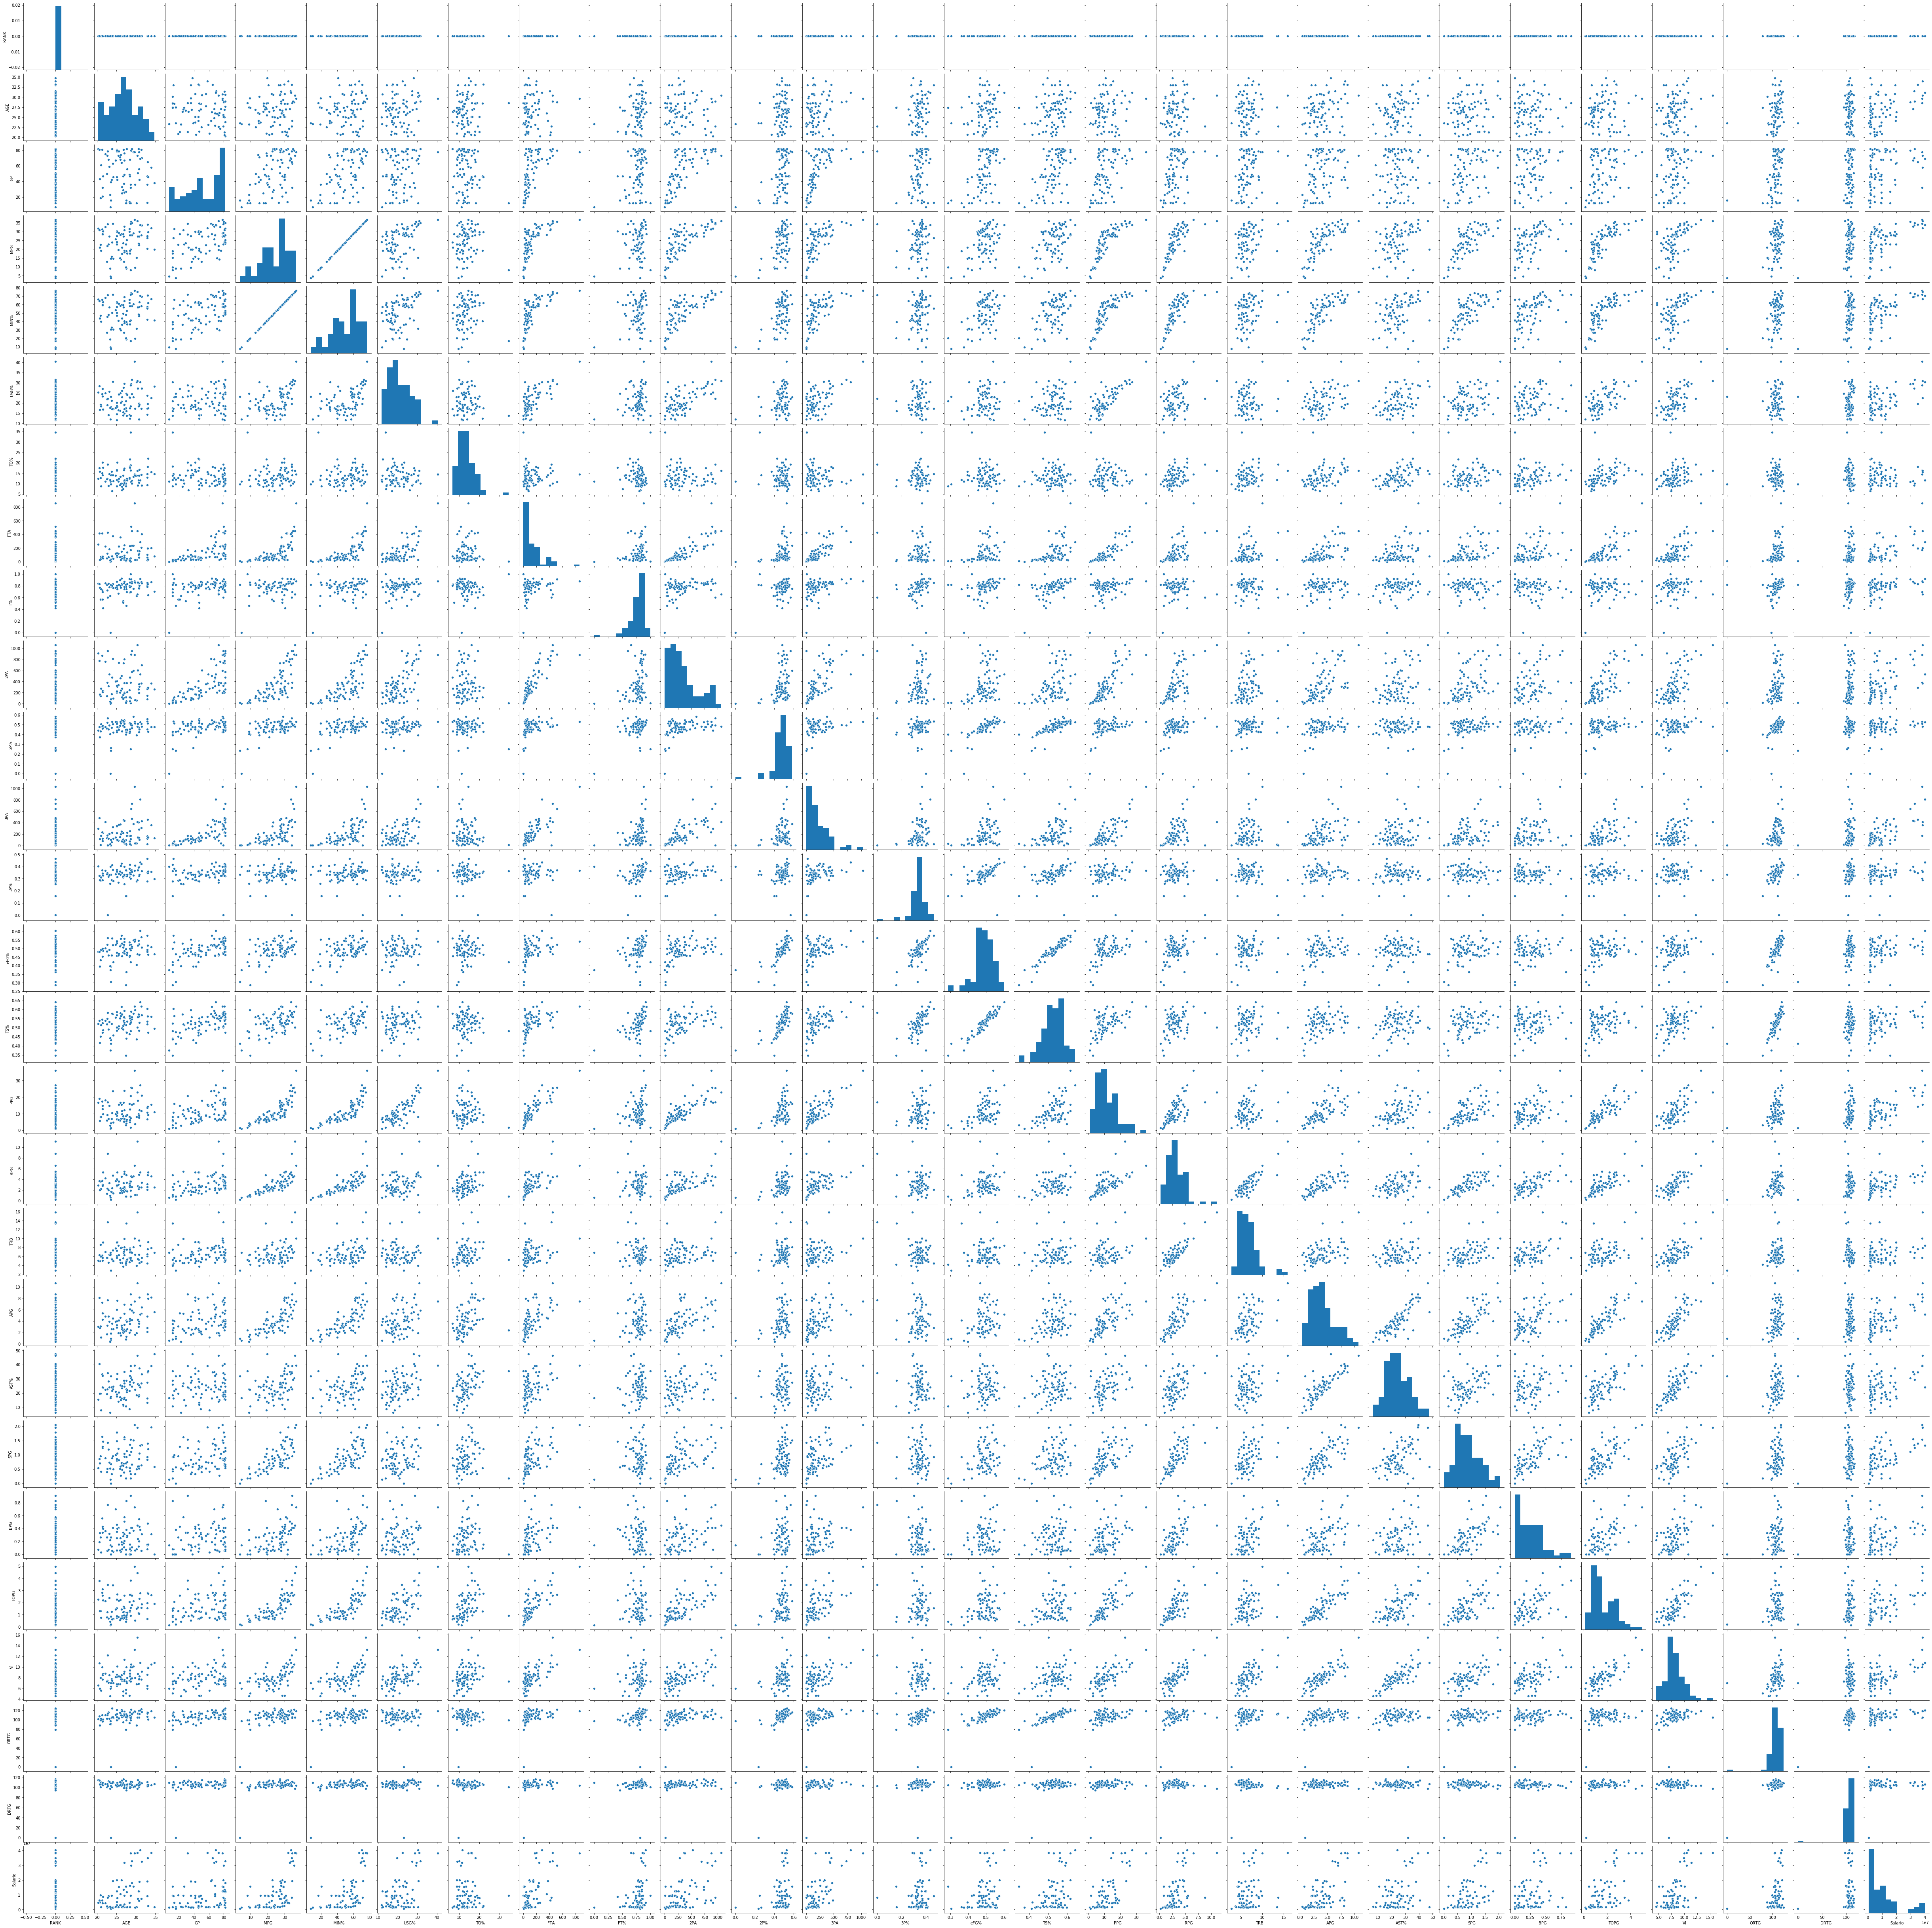

In [39]:
sns.pairplot(point_guard)

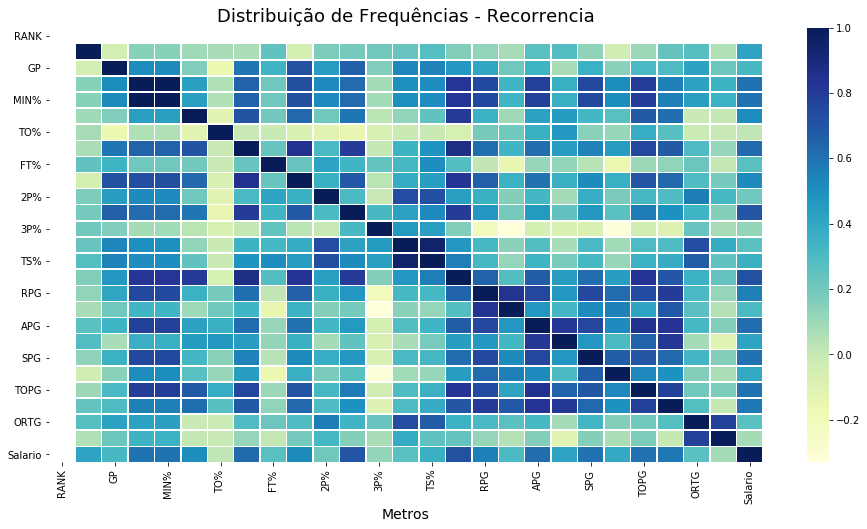

In [40]:
ax = sns.heatmap(point_guard.corr(), linewidths=.5, cmap="YlGnBu", )
ax.figure.set_size_inches(16,8)
ax.set_title('Distribuição de Frequências - Recorrencia', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

### Analisando o priemiro ano do Luka (gosto dele)

In [93]:
players20 = players_stats20.merge(players_salary, left_on='FULL NAME', right_on='Jogador', how='left')
players20

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,TRB,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Jogador,Posição,Time,Salario
0,NaN,Steven Adams,Okc,C,26.41,23,27.3,56.9,17.5,14.5,68,0.515,181,0.608,1,0.000,0.604,0.602,11.1,9.6,19.5,2.7,16.0,0.43,1.30,1.57,9.7,121.5,101.6,Steven Adams,C,Oklahoma City Thunder,25842697.0
1,NaN,Bam Adebayo,Mia,C-F,22.42,27,34.1,71.1,19.6,19.2,157,0.656,259,0.587,9,0.111,0.573,0.608,15.2,10.8,18.0,4.6,21.1,1.44,1.26,2.96,10.7,114.8,97.2,Bam Adebayo,C,Miami Heat,3454080.0
2,NaN,LaMarcus Aldridge,San,F-C,34.41,24,33.6,69.9,23.2,8.4,91,0.824,322,0.519,41,0.341,0.518,0.559,18.8,7.4,11.5,2.5,11.5,0.63,1.79,1.54,8.4,112.4,108.3,LaMarcus Aldridge,C,San Antonio Spurs,26000000.0
3,NaN,Nickeil Alexander-Walker,Nor,G,21.29,22,13.7,28.5,24.5,13.4,16,0.688,69,0.319,79,0.342,0.422,0.439,6.2,2.1,8.3,1.8,19.2,0.41,0.09,1.09,8.4,88.3,109.6,Nickeil Alexander-Walker,SG,New Orleans Pelicans,2964840.0
4,NaN,Grayson Allen,Mem,G,24.19,13,18.9,39.5,19.3,13.1,17,0.882,49,0.469,43,0.349,0.495,0.533,8.2,2.9,8.2,1.5,10.9,0.38,0.08,1.15,7.0,98.9,107.9,Grayson Allen,SG,Memphis Grizzlies,2429400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,NaN,Thaddeus Young,Chi,F,31.49,28,21.7,45.3,21.4,14.6,32,0.563,159,0.459,91,0.330,0.472,0.481,9.1,4.3,10.4,1.8,13.4,1.04,0.25,1.61,7.6,93.4,101.9,Thaddeus Young,PF,Chicago Bulls,12900000.0
462,NaN,Trae Young,Atl,G,21.24,26,34.9,72.7,34.1,16.9,189,0.857,301,0.502,234,0.368,0.523,0.584,27.8,4.2,6.6,8.5,43.6,1.23,0.08,4.85,11.4,109.7,114.6,Trae Young,PG,Atlanta Hawks,6273000.0
463,NaN,Cody Zeller,Cha,C,27.20,26,23.6,49.1,20.4,13.4,71,0.690,174,0.598,46,0.326,0.575,0.601,11.6,7.9,18.1,1.2,8.9,0.54,0.46,1.50,8.1,115.0,102.6,Cody Zeller,PF,Charlotte Hornets,14471910.0
464,NaN,Ante Zizic,Cle,C,22.95,9,10.1,21.0,15.4,3.1,6,0.833,29,0.552,0,0.000,0.552,0.585,4.1,2.4,13.4,0.0,0.0,0.22,0.22,0.11,0.0,121.0,105.6,Ante Zizic,C,Cleveland Cavaliers,2281800.0


In [94]:
players20.loc[players20['FULL NAME'].str.contains('Luka Doncic')]

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,TRB,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Jogador,Posição,Time,Salario
122,NaN,Luka Doncic,Dal,G-F,20.8,25,32.2,67.0,37.0,15.7,229,0.803,257,0.623,233,0.326,0.559,0.62,29.3,9.6,15.5,8.9,48.0,1.16,0.12,4.4,16.9,120.2,100.4,Luka Doncic,SF,Dallas Mavericks,7683360.0


### Olhando a comparação do Ben vs os demais jogadfores da mesma posição

## Comparação especial Kristaps

In [0]:
kp = players20.loc[players20['FULL NAME'].str.contains('Kristaps')]
bs20 = players20.loc[players20['FULL NAME'].str.contains('Ben Simmons')]

In [96]:
kp

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,TRB,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Jogador,Posição,Time,Salario
369,NaN,Kristaps Porzingis,Dal,F-C,24.38,25,30.7,63.9,25.7,8.2,99,0.727,230,0.443,152,0.336,0.467,0.504,17.2,9.0,15.3,1.5,7.2,0.52,2.04,1.52,8.0,103.0,99.2,Kristaps Porzingis,PF,Dallas Mavericks,27285000.0


In [0]:
power_foward = players.query('Posição == " PF"')

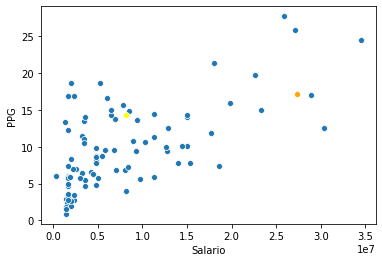

In [101]:
sns.scatterplot(x=power_foward['Salario'], y=power_foward.PPG)
sns.scatterplot(x=kp['Salario'], y=kp.PPG, facecolor='orange')
sns.scatterplot(x=bs20['Salario'], y=bs20.PPG, facecolor='yellow')

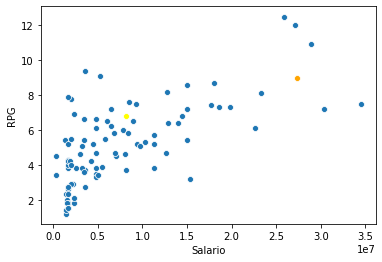

In [102]:
sns.scatterplot(x=power_foward['Salario'], y=power_foward.RPG)
sns.scatterplot(x=kp['Salario'], y=kp.RPG, facecolor='orange')
sns.scatterplot(x=bs20['Salario'], y=bs20.RPG, facecolor='yellow')

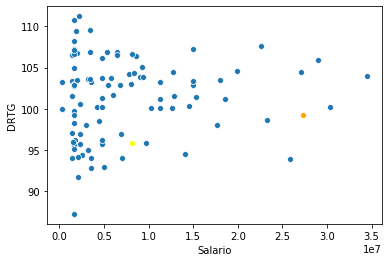

In [103]:
sns.scatterplot(x=power_foward['Salario'], y=power_foward.DRTG)
sns.scatterplot(x=kp['Salario'], y=kp.DRTG, facecolor='orange')
sns.scatterplot(x=bs20['Salario'], y=bs20.DRTG, facecolor='yellow')

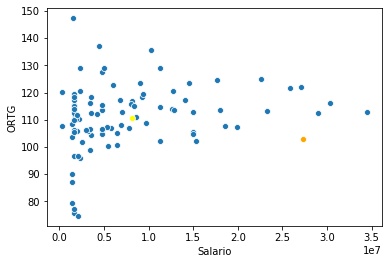

In [104]:
sns.scatterplot(x=power_foward['Salario'], y=power_foward.ORTG)
sns.scatterplot(x=kp['Salario'], y=kp.ORTG, facecolor='orange')
sns.scatterplot(x=bs20['Salario'], y=bs20.ORTG, facecolor='yellow')

# Conclusão

Apesar de não possuir estatísticas para o arremesso de 3pt, o atleta analidado, Ben Simmons (76rs) tem um desempenho melhor do que os jogadores de sua posição que são pagos dentro da mesma faixa salarial. 
A diferença salarial vs o comparativo é mairo do que a diferença das estatísticas analisadas, incluindo idade e experiência.